# Project - Netflix Data Analysis
#### Student: Trung Dinh Vu

In [142]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency, poisson, ttest_ind, pearsonr, spearmanr, kendalltau, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, IterativeImputer
from wordcloud import WordCloud

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/travisv12/Netflix-Data-Analysis/refs/heads/main/netflix_titles.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
df.head(5)

Dataset Preview:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Dataset Exploration** 

### Basic data info

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [144]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### Value Counts and Unique Counts

In [145]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [146]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [147]:
print("Unique countries:", df['country'].nunique())
print("Unique titles:", df['title'].nunique())
print("Unique directors:", df['director'].nunique())
print("Unique genres:", df['listed_in'].nunique())

Unique countries: 748
Unique titles: 8807
Unique directors: 4528
Unique genres: 514


## Clean Data

### **Check the count and percentage of null values in each column** 

In [148]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

missing_df.sort_values('Percentage', ascending=False)

,Missing Values,Percentage
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


### **Fix missing values and Change data format for easier readings and analysis**

In [149]:
# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and year from date_added for time series analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Clean duration column - separate numeric value and unit
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('(\w+)$')

# Fill common missing values with appropriate placeholders
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Replace null values in the "rating" column with its mode
df["rating"].fillna(df["rating"].mode()[0], inplace=True)

# Replace null values in the "duration" column with its mode
df["duration"].fillna(df["duration"].mode()[0], inplace=True)

# Replace "Seasons" with "Season" in the duration_unit column
df['duration_unit'] = df['duration_unit'].replace('Seasons', 'Season')

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

# Display the updated dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Season


### **The dataset is now free of null values**

In [150]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

missing_df.sort_values('Percentage', ascending=False)

,Missing Values,Percentage
show_id,0,0.0
type,0,0.0
title,0,0.0
director,0,0.0
cast,0,0.0
country,0,0.0
date_added,0,0.0
release_year,0,0.0
rating,0,0.0
duration,0,0.0


## **Descriptive Summary**

###  Most common countries, directors, and genres

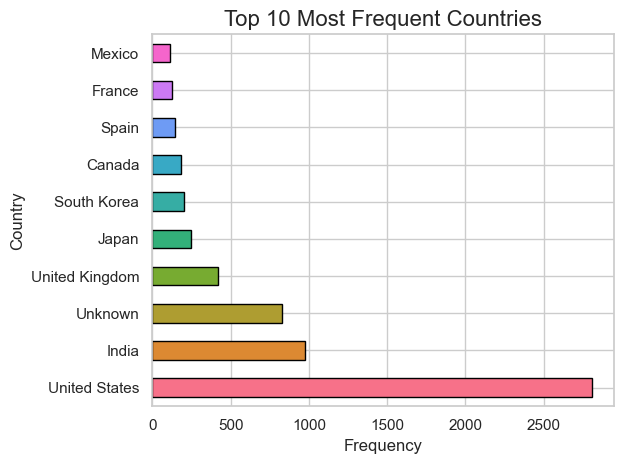

In [153]:
# Generate a list of unique colors
colors = sns.color_palette("husl", 10)

# Plot the top 10 most frequent values in the 'country' column as a horizontal bar chart
df['country'].value_counts().head(10).plot(kind='barh', color=colors, edgecolor='black')

# Add a title and labels for the axes
plt.title('Top 10 Most Frequent Countries', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

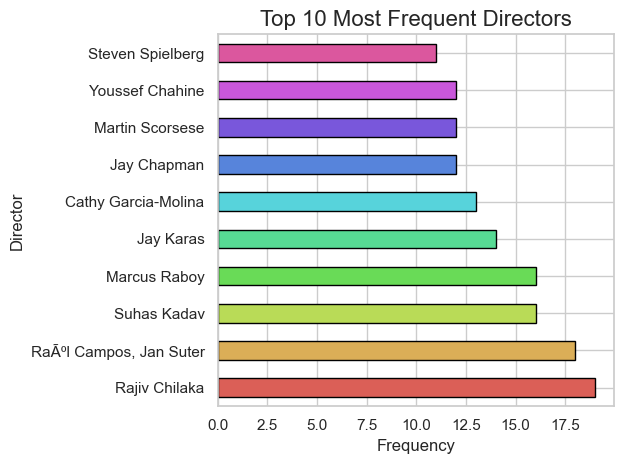

In [154]:
# Filter out the "unknown" value and get the top 10 most frequent directors
filtered_directors = df['director'][df['director'] != 'Unknown'].value_counts().head(10)

# Generate a list of unique colors
colors = sns.color_palette("hls", len(filtered_directors))

# Plot the filtered data as a horizontal bar chart
filtered_directors.plot(kind='barh', color=colors, edgecolor='black')

# Add a title and labels for the axes
plt.title('Top 10 Most Frequent Directors', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Type distribution (Movies vs TV Shows)

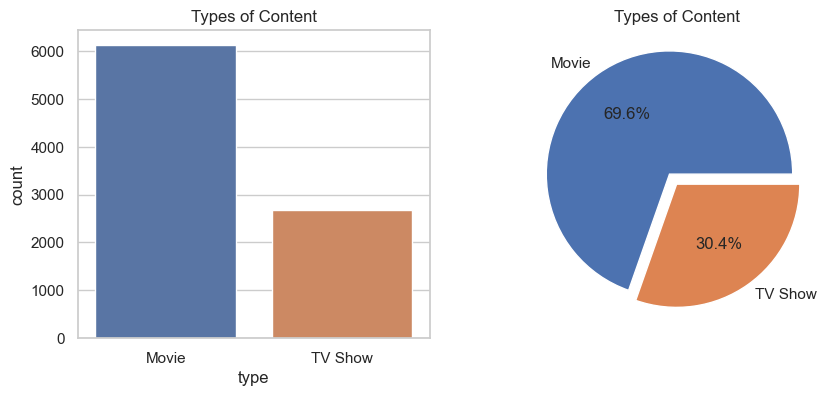

In [155]:
type_value = netflix['type'].value_counts()
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.set()
sns.countplot(data = netflix, x = 'type', ax = axes[0])
axes[0].set_title('Types of Content')

sns.set()
axes[1].pie(type_value, labels = type_value.index, explode=[0.1, 0], autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()

### Ratings distribution

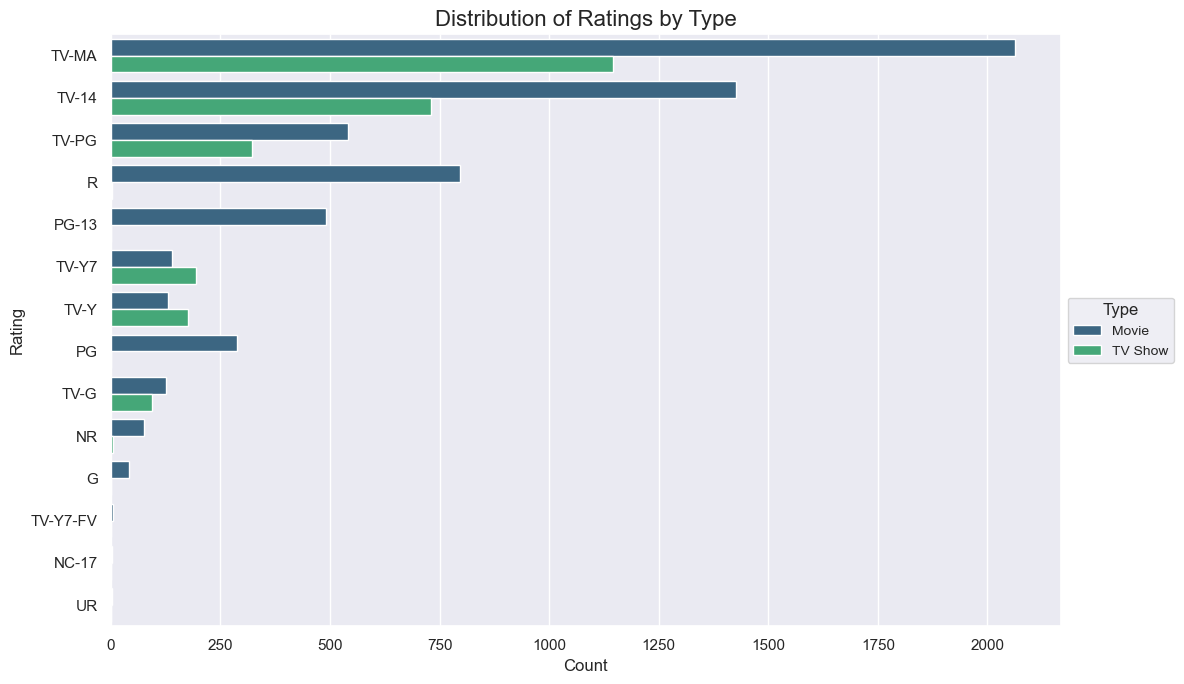

In [156]:
plt.figure(figsize=(12, 7))
# Create a count plot for the 'rating' column with separate bars for Movies and TV Shows
sns.countplot(
    y='rating', 
    data=df, 
    order=df['rating'].value_counts().index, 
    hue='type',  # Differentiate between Movies and TV Shows
    palette='viridis'
)

# Add a title and labels for the axes
plt.title('Distribution of Ratings by Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Add a legend for the hue
plt.legend(title='Type', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Duration distribution

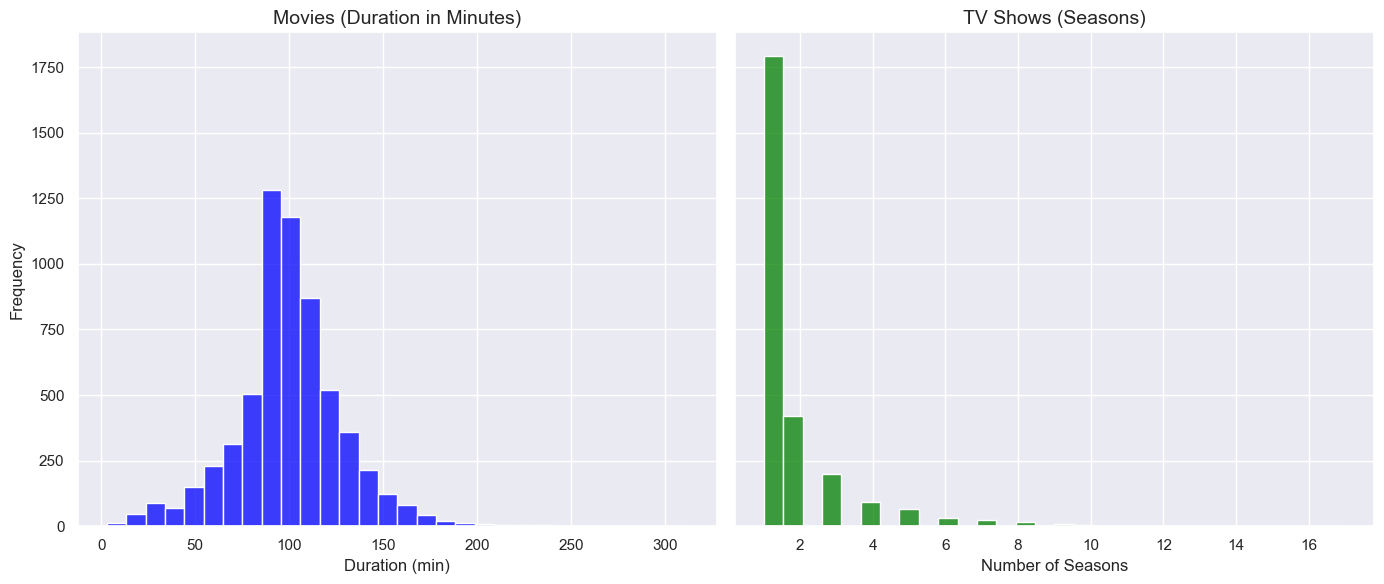

In [157]:
# Filter data for movies and TV shows
movies = df[df['duration_unit'] == 'min']['duration_value']
tv_shows = df[df['duration_unit'].str.contains('Season', case=False, na=False)]['duration_value']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for movies
sns.histplot(movies, bins=30, ax=axes[0], color='blue')
axes[0].set_title('Movies (Duration in Minutes)', fontsize=14)
axes[0].set_xlabel('Duration (min)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plot histogram for TV shows
sns.histplot(tv_shows, bins=30, ax=axes[1], color='green')
axes[1].set_title('TV Shows (Seasons)', fontsize=14)
axes[1].set_xlabel('Number of Seasons', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## Time-Based Analysis

### Shows/movies added to Netflix over time

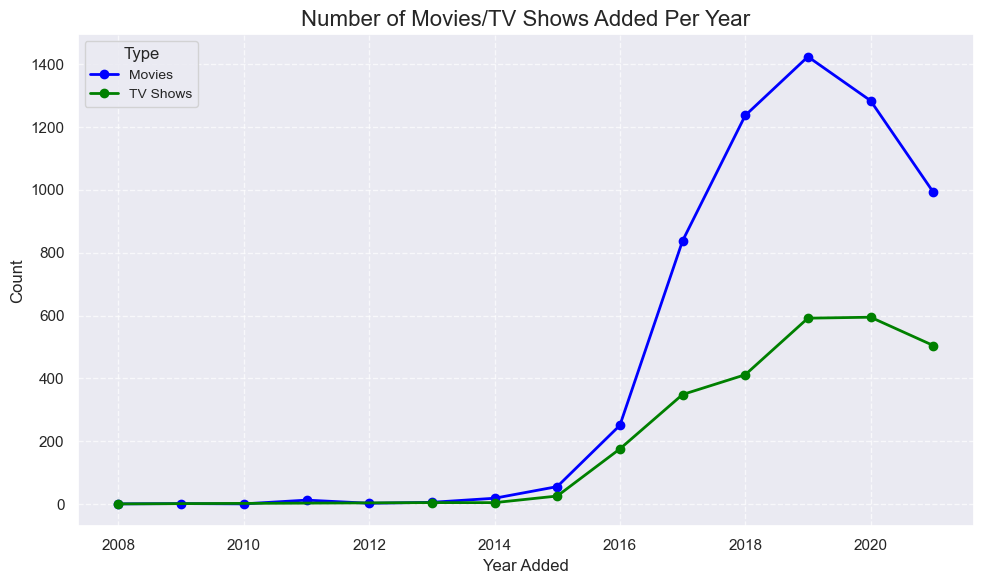

In [158]:
# Filter data for Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count the number of Movies and TV Shows added per year
movies_per_year = movies['year_added'].value_counts().sort_index()
tv_shows_per_year = tv_shows['year_added'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='blue', linewidth=2, label='Movies')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, marker='o', color='green', linewidth=2, label='TV Shows')

# Add a title and labels for the axes
plt.title('Number of Movies/TV Shows Added Per Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a legend
plt.legend(title='Type', fontsize=10)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Monthly trend of new additions

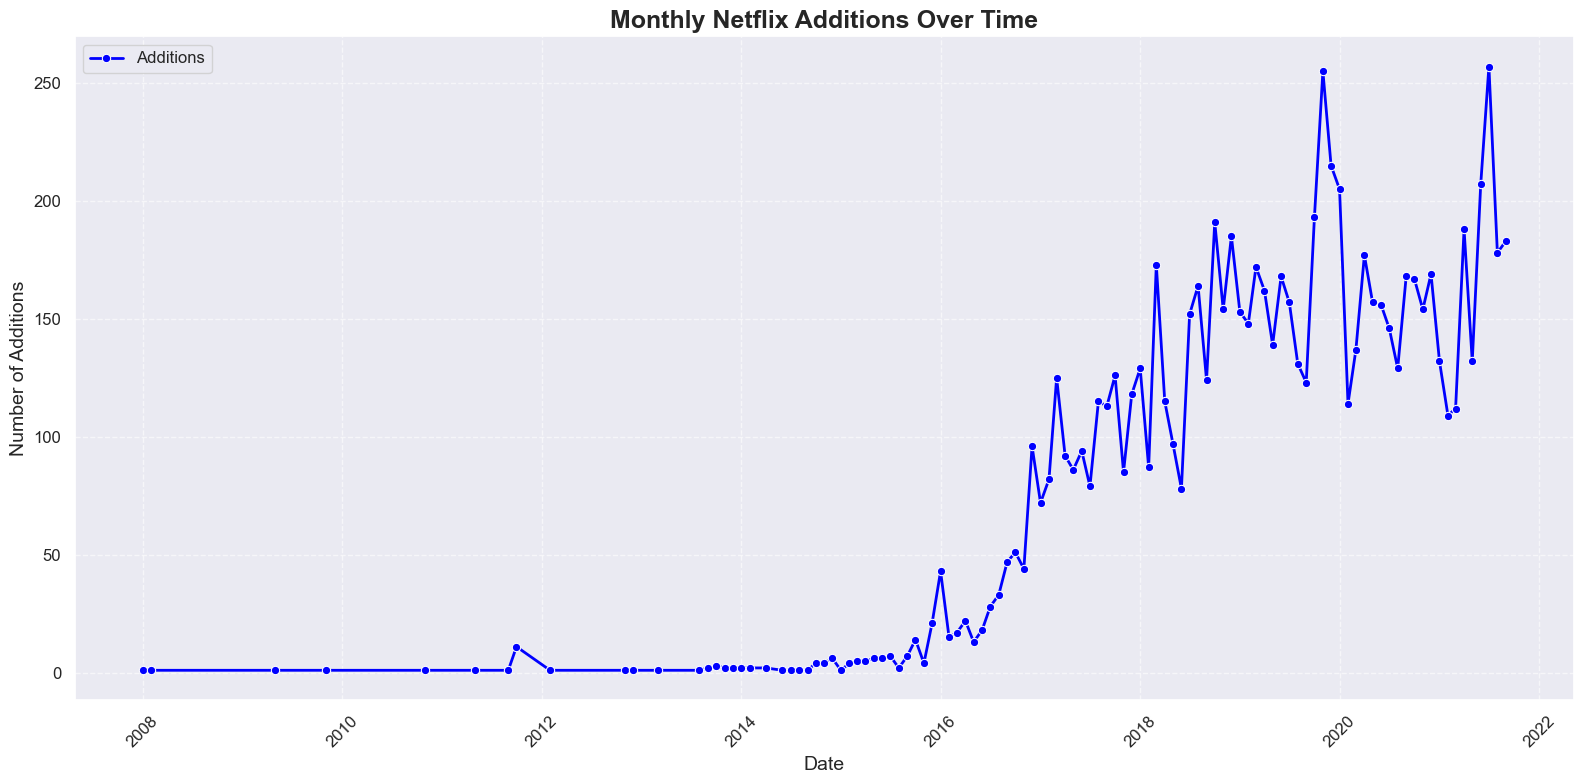

In [166]:
# Create the plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_monthly, x='date', y='counts', color='blue', linewidth=2, marker='o')

# Add a title and labels
plt.title("Monthly Netflix Additions Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Additions", fontsize=14)

# Customize the grid and ticks
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(["Additions"], loc='upper left', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Type trend over years

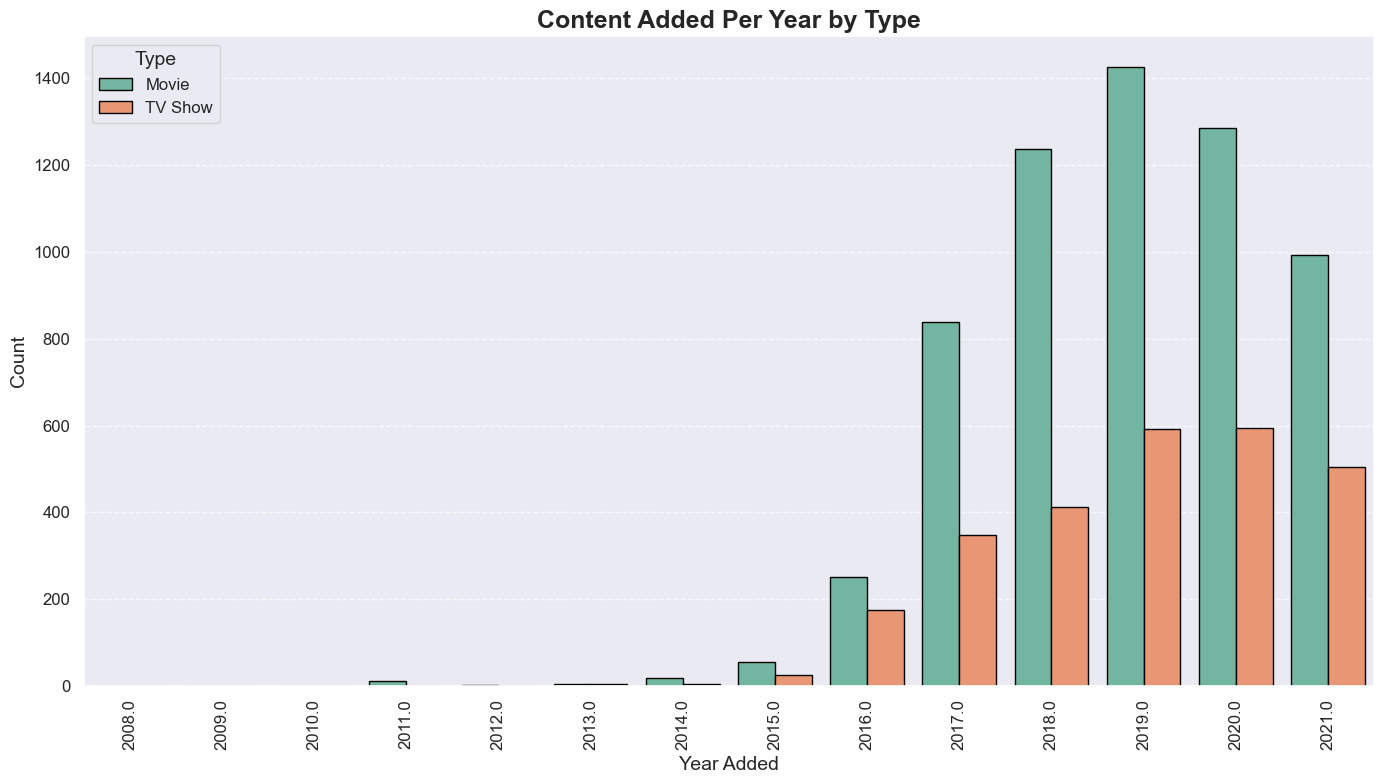

In [167]:
# Create the count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='year_added', hue='type', data=df, palette='Set2', edgecolor='black')

# Add a title and labels
plt.title('Content Added Per Year by Type', fontsize=18, fontweight='bold')
plt.xlabel('Year Added', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Type', fontsize=12, title_fontsize=14, loc='upper left')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the p


### Average Duration Trend Over Years

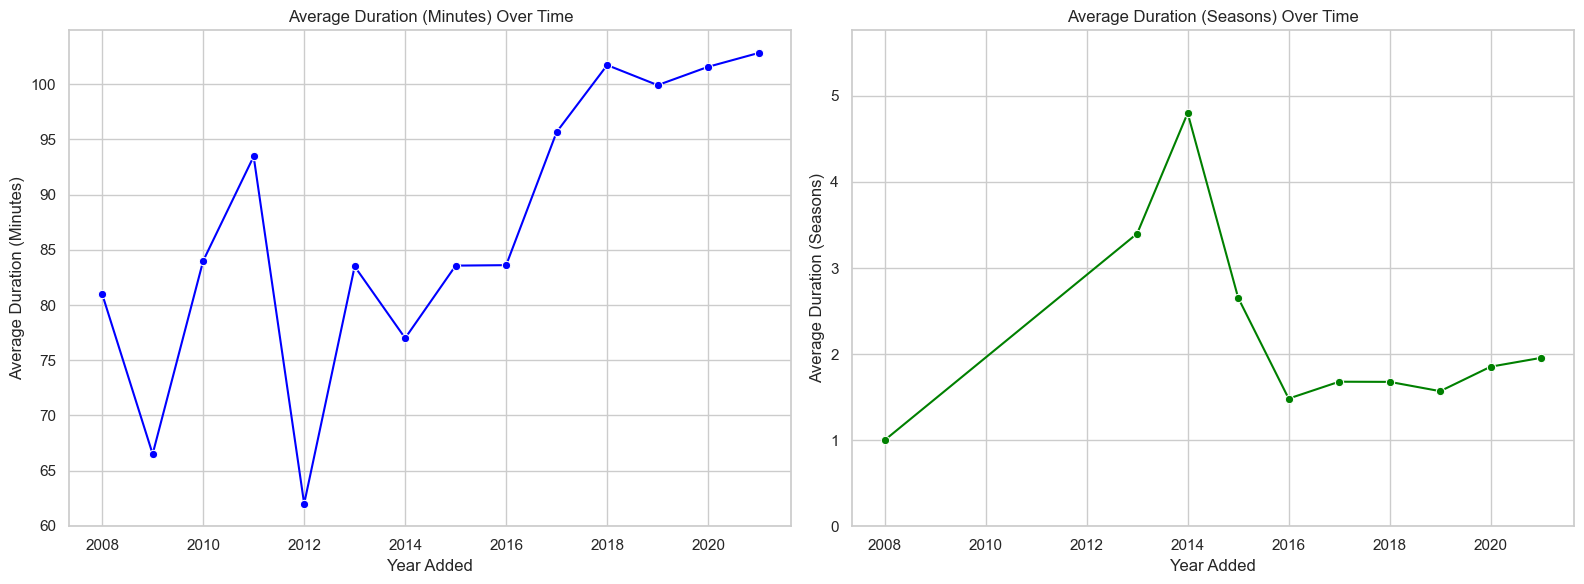

In [177]:
# Filter data for "min" and "Season"
duration_min = duration_trend[duration_trend['duration_unit'] == 'min']
duration_season = duration_trend[duration_trend['duration_unit'] == 'Season']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot for "min"
sns.lineplot(data=duration_min, x='year_added', y='duration_value', marker='o', ax=axes[0], color='blue')
axes[0].set_title('Average Duration (Minutes) Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Average Duration (Minutes)')
axes[0].grid(True)

# Plot for "Season"
sns.lineplot(data=duration_season, x='year_added', y='duration_value', marker='o', ax=axes[1], color='green')
axes[1].set_title('Average Duration (Seasons) Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Average Duration (Seasons)')
axes[1].set_ylim(0, duration_season['duration_value'].max() * 1.2)  # Adjust range for better visibility
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Trend of Popular Genres Over Time

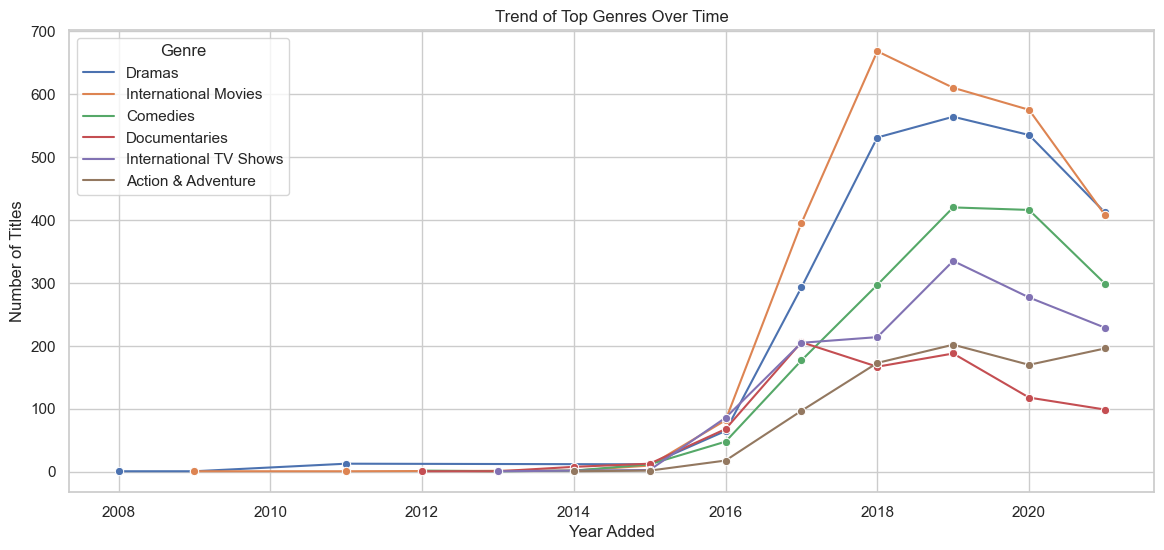

In [178]:
# Explode genre list
df_genres = df.copy()
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# Group by year and genre
genre_trend = df_genres.groupby(['year_added', 'genre']).size().reset_index(name='count')

# Get top 6 genres overall to focus on
top_genres = genre_trend.groupby('genre')['count'].sum().nlargest(6).index
genre_trend = genre_trend[genre_trend['genre'].isin(top_genres)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=genre_trend, x='year_added', y='count', hue='genre', marker='o')
plt.title('Trend of Top Genres Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


## More Visualisations

### Top 10 genres

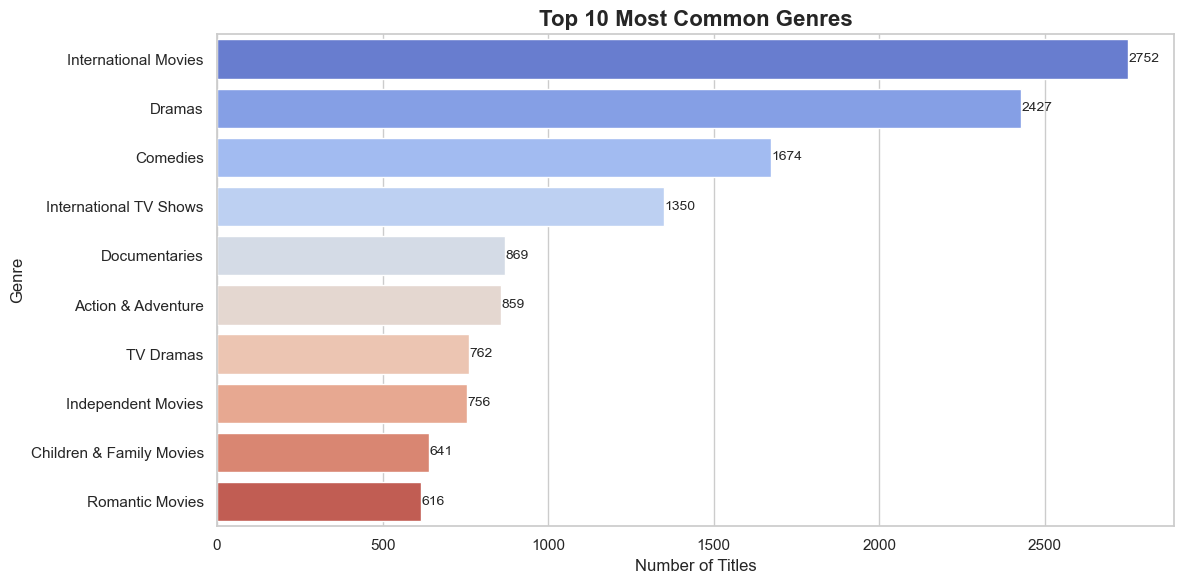

In [172]:
# Count the genres and get the top 10
from collections import Counter

genre_counts = Counter([genre for sublist in df['listed_in'].str.split(', ') for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.barplot(data=top_genres, x='Count', y='Genre', palette='coolwarm')

# Add a title and labels
plt.title('Top 10 Most Common Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Add value annotations to the bars
for index, value in enumerate(top_genres['Count']):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Country-wise content

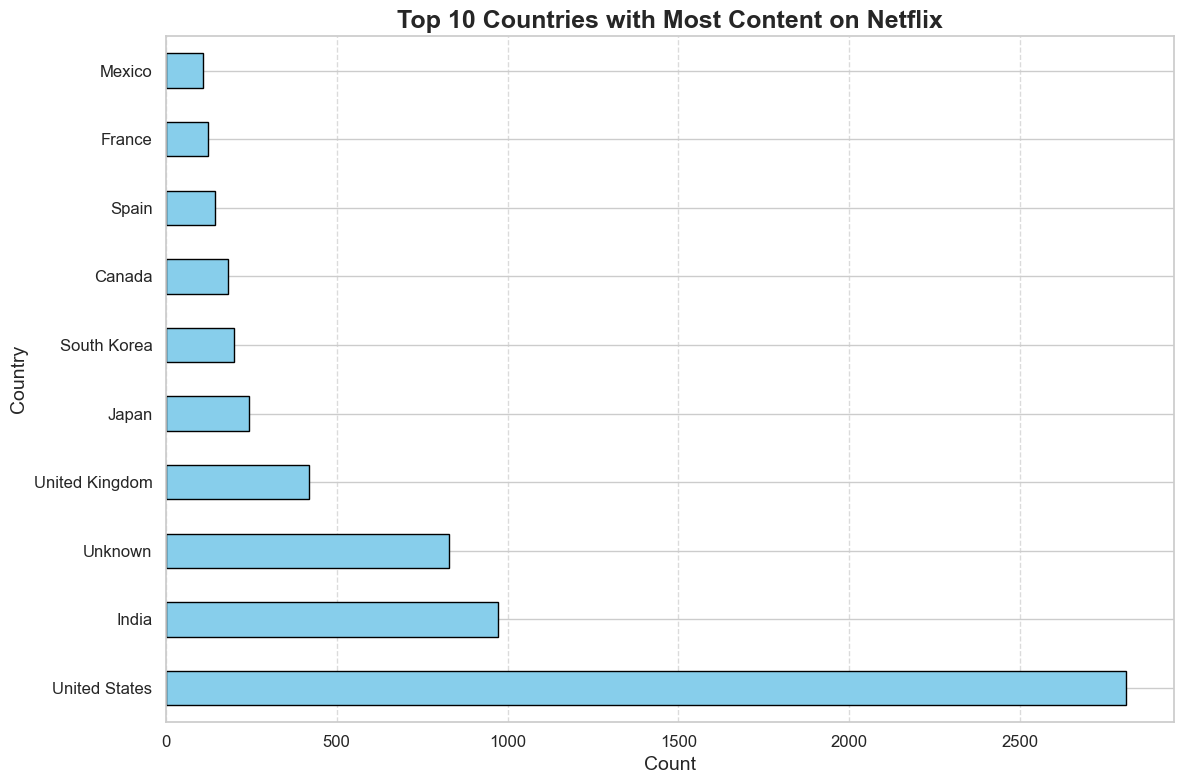

In [173]:
# Create the bar plot
plt.figure(figsize=(12, 8))
top_countries.plot(kind='barh', color='skyblue', edgecolor='black')

# Add a title and labels
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Customize the grid and ticks
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Most Frequent Actors/Actresses

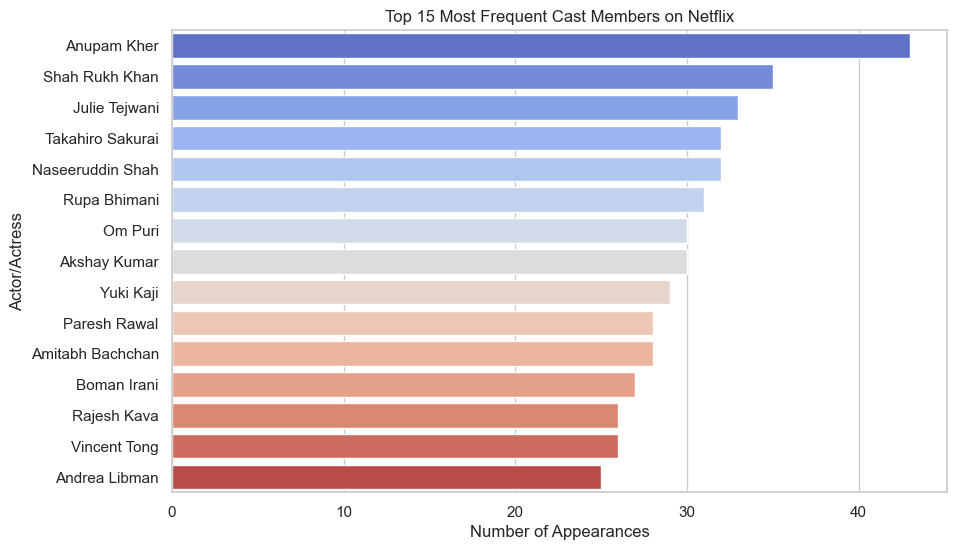

In [175]:
# Split and explode cast members
df_cast = df.copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove unknowns
df_cast = df_cast[df_cast['cast'] != 'Unknown']

# Count top actors
top_actors = df_cast['cast'].value_counts().head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 15 Most Frequent Cast Members on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Actress')
plt.grid(True, axis='x')
plt.show()


### Text-Based Analysis

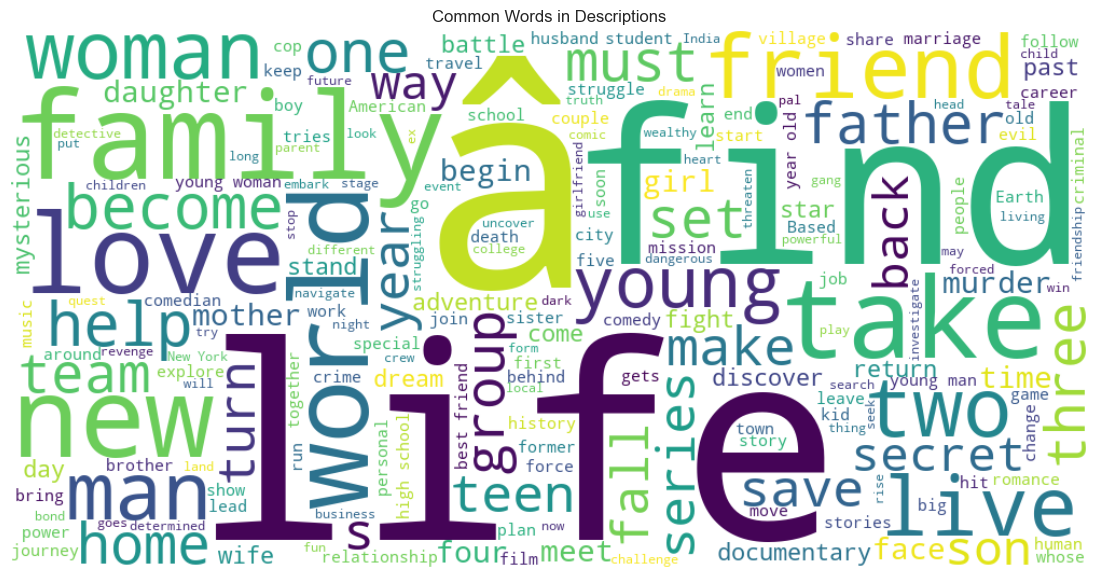

In [138]:
from wordcloud import WordCloud

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Descriptions")
plt.show()


## Predictive Element (Regression)
### Relationship between Releaser Year and Added Year 

#### Visualize the Lag Time

In [179]:
# Make sure both years are numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')

# Create lag time column
df['lag_time'] = df['year_added'] - df['release_year']

# Drop rows with negative or missing lag time
df = df[df['lag_time'].notnull() & (df['lag_time'] >= 0)]

# Quick peek
df[['title', 'release_year', 'year_added', 'lag_time']].head()


,title,release_year,year_added,lag_time
0,Dick Johnson Is Dead,2020,2021.0,1.0
1,Blood & Water,2021,2021.0,0.0
2,Ganglands,2021,2021.0,0.0
3,Jailbirds New Orleans,2021,2021.0,0.0
4,Kota Factory,2021,2021.0,0.0


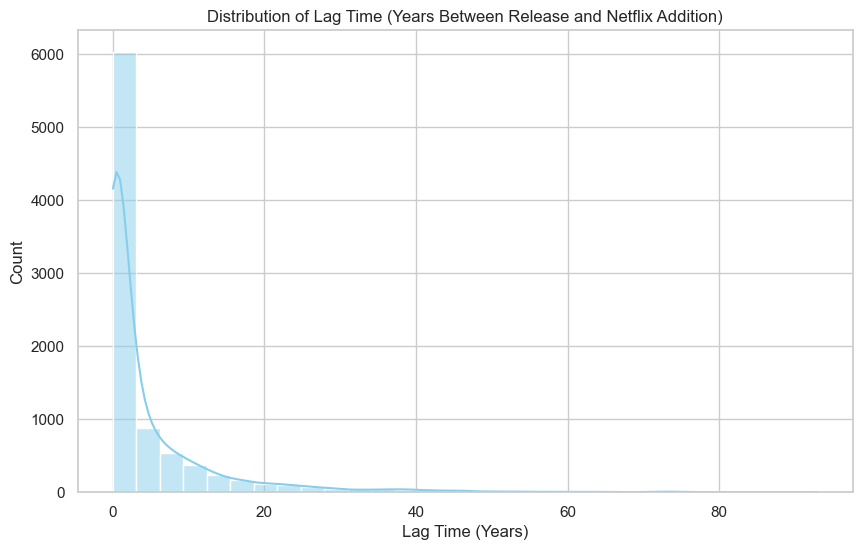

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lag_time'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Lag Time (Years Between Release and Netflix Addition)")
plt.xlabel("Lag Time (Years)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


#### Predictive Modeling — When will a show get added?


R² score: 0.97
RMSE: 1.57


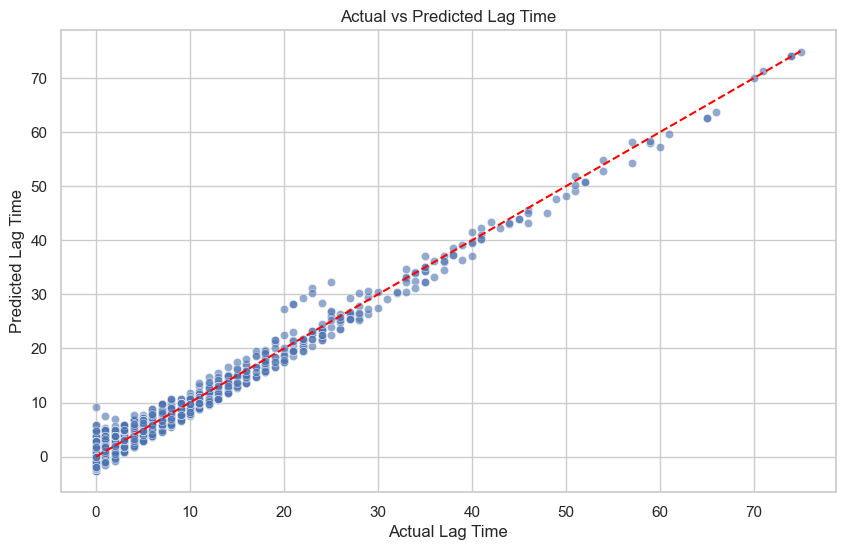

In [181]:
# Encode type (Movie/TV Show)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Prepare features & target
X = df[['release_year', 'duration_value', 'type_encoded']].dropna()
y = df.loc[X.index, 'lag_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(f"R² score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

# Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.xlabel("Actual Lag Time")
plt.ylabel("Predicted Lag Time")
plt.title("Actual vs Predicted Lag Time")
plt.grid(True)
plt.show()


R² Score (0.97):  
The R² score, also known as the coefficient of determination, measures how well the model explains the variance in the target variable (lag_time).
A score of 0.97 means that 97% of the variance in the lag time is explained by the model. This is a very high score, indicating that the model fits the data well.

RMSE (1.57):  
The Root Mean Squared Error (RMSE) measures the average difference between the predicted and actual values of the lag time. It is in the same unit as the target variable (lag_time).
An RMSE of 1.57 means that, on average, the model's predictions are off by about 1.57 years. Given the high R² score, this error is relatively small and suggests that the model is making accurate predictions.

Scatter Plot (Actual vs Predicted):  
The scatter plot shows the relationship between the actual and predicted lag times. The red dashed line represents the ideal case where predictions perfectly match the actual values.
The points are closely aligned with the red line, further confirming that the model's predictions are highly accurate.

Conclusion:
The model is highly effective at predicting the lag time based on the features provided (release_year, duration_value, and type_encoded). However, you should still validate the model's performance on unseen data and check for potential overfitting, as the R² score is very close to 1.